<a href="https://colab.research.google.com/github/Lyynn777/Smart-Construction-Safety-Detector-YOLOv8/blob/main/Smart_Construction_Safety_Detector_(YOLOv8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup

In [1]:
!pip -q install ultralytics==8.3.30 roboflow==1.1.42 opencv-python==4.10.0.84
import ultralytics
ultralytics.checks()  # sanity check: CUDA, versions, etc.
from ultralytics import YOLO
import os, glob, shutil, cv2


Ultralytics 8.3.30 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.6/112.6 GB disk)


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="uUybEkLZNxjuXcz1jSxG")
project = rf.workspace("test1-ut0wa").project("safety-vest-safety-helmet")
version = project.version(8)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.3.30, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Safety-Vest-+-Safety-Helmet-8 in yolov8:: 100%|██████████| 1576/1576 [00:00<00:00, 8831.51it/s]


In [3]:
import glob, os, yaml

yaml_path = glob.glob("/content/**/data.yaml", recursive=True)[0]
print("Found data.yaml:", yaml_path)
print("\n--- Preview ---\n")
print(open(yaml_path).read())

# Optional: quick check for images
print("\nSample train images:")
!ls $(dirname $yaml_path)/train/images | head -n 10


Found data.yaml: /content/Safety-Vest-+-Safety-Helmet-8/data.yaml

--- Preview ---

names:
- helmet
- vest
nc: 2
roboflow:
  license: Public Domain
  project: safety-vest-safety-helmet
  url: https://universe.roboflow.com/test1-ut0wa/safety-vest-safety-helmet/dataset/8
  version: 8
  workspace: test1-ut0wa
test: ../test/images
train: Safety-Vest-+-Safety-Helmet-8/train/images
val: Safety-Vest-+-Safety-Helmet-8/valid/images


Sample train images:
053124squatstoop_jpg.rf.2099840c1583af59bd70a6eb1c211b6c.jpg
053124squatstoop_jpg.rf.5b87efb4f544b9104e8d0f9ab563e5d9.jpg
053124squatstoop_jpg.rf.c6f6b46e9d9100d690d300a82ee177d1.jpg
06_jpg.rf.2292c3e90b5c986b87fa14d25e60755f.jpg
06_jpg.rf.2ed4057c0251929900bb1d371fa207ba.jpg
06_jpg.rf.42510d0d4f2ed55ecb96a91473e67618.jpg
097e6724a6e55a77e3ef404908c1b6b2_jpg.rf.1d145d10f7ce41ed724d02d8035540d8.jpg
097e6724a6e55a77e3ef404908c1b6b2_jpg.rf.3dd4a58fa6448e36e6fad6451eae4826.jpg
097e6724a6e55a77e3ef404908c1b6b2_jpg.rf.decfea08d0675d1ad79793464d7fa8fb

In [6]:
import yaml
from ultralytics import YOLO
import glob, os

# Path to data.yaml
yaml_path = "/content/Safety-Vest-+-Safety-Helmet-8/data.yaml"

# --- FIX: Update data.yaml paths ---
with open(yaml_path, 'r') as f:
    data_yaml = yaml.safe_load(f)

# Correct relative paths
data_yaml['train'] = 'train/images'
data_yaml['val'] = 'valid/images'
data_yaml['test'] = 'test/images'

with open(yaml_path, 'w') as f:
    yaml.safe_dump(data_yaml, f)

print(f"Updated {yaml_path} with correct image paths.")
print("\n--- New Preview of data.yaml ---\n")
print(open(yaml_path).read())
# --- END FIX ---


# Initialize YOLOv8 small model
model = YOLO("yolov8s.pt")

# Train
results = model.train(
    data=yaml_path,
    epochs=50,          # you can increase to 100 if you have time
    imgsz=640,
    batch=16,
    patience=15,
    name="ppe_yolov8s",
    device=0,           # use GPU
    verbose=True
)

Updated /content/Safety-Vest-+-Safety-Helmet-8/data.yaml with correct image paths.

--- New Preview of data.yaml ---

names:
- helmet
- vest
nc: 2
roboflow:
  license: Public Domain
  project: safety-vest-safety-helmet
  url: https://universe.roboflow.com/test1-ut0wa/safety-vest-safety-helmet/dataset/8
  version: 8
  workspace: test1-ut0wa
test: test/images
train: train/images
val: valid/images

New https://pypi.org/project/ultralytics/8.3.225 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.30 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Safety-Vest-+-Safety-Helmet-8/data.yaml, epochs=50, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=ppe_yolov8s3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, r

100%|██████████| 755k/755k [00:00<00:00, 24.0MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 110MB/s]


AMP: checks passed ✅


train: Scanning /content/Safety-Vest-+-Safety-Helmet-8/train/labels... 720 images, 24 backgrounds, 0 corrupt: 100%|██████████| 720/720 [00:00<00:00, 2419.06it/s]


train: New cache created: /content/Safety-Vest-+-Safety-Helmet-8/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/Safety-Vest-+-Safety-Helmet-8/valid/labels... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<00:00, 923.65it/s]

val: New cache created: /content/Safety-Vest-+-Safety-Helmet-8/valid/labels.cache


Plotting labels to runs/detect/ppe_yolov8s3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/ppe_yolov8s3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.07G      1.942      2.052      1.624        126        640: 100%|██████████| 45/45 [00:15<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all         31        190      0.679       0.66      0.695      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.02G      1.846      1.329      1.507        200        640: 100%|██████████| 45/45 [00:13<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         31        190      0.478      0.573      0.491      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.84G       1.84      1.282       1.49        162        640: 100%|██████████| 45/45 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         31        190      0.732       0.55      0.613      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.91G      1.816      1.246      1.492        195        640: 100%|██████████| 45/45 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         31        190      0.616      0.639       0.67      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.05G      1.783      1.204      1.467        166        640: 100%|██████████| 45/45 [00:13<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         31        190      0.514      0.468      0.458      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.87G      1.741      1.105      1.427        131        640: 100%|██████████| 45/45 [00:13<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         31        190      0.723      0.717      0.739      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.93G      1.726      1.092      1.415        155        640: 100%|██████████| 45/45 [00:13<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         31        190      0.837      0.713      0.783      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.79G      1.746      1.112      1.428        177        640: 100%|██████████| 45/45 [00:13<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         31        190      0.821      0.644      0.727       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.02G      1.703      1.048      1.388        169        640: 100%|██████████| 45/45 [00:13<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         31        190      0.765      0.692      0.738      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.83G      1.678      1.029      1.372        141        640: 100%|██████████| 45/45 [00:13<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         31        190      0.814      0.732      0.783      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       3.9G      1.656     0.9767      1.361        187        640: 100%|██████████| 45/45 [00:13<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         31        190      0.824      0.702      0.758      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.87G      1.623     0.9444      1.348        188        640: 100%|██████████| 45/45 [00:14<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         31        190      0.827      0.721      0.786      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.12G      1.603     0.9326      1.354        216        640: 100%|██████████| 45/45 [00:13<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         31        190      0.679       0.72      0.707      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.84G      1.592     0.9006      1.338        153        640: 100%|██████████| 45/45 [00:13<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         31        190      0.799      0.677      0.725      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.79G      1.584     0.9004      1.334        186        640: 100%|██████████| 45/45 [00:13<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         31        190      0.818      0.714      0.764      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.83G      1.547     0.8723      1.311        179        640: 100%|██████████| 45/45 [00:13<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         31        190      0.812      0.735      0.769      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.02G      1.532     0.8418      1.303        161        640: 100%|██████████| 45/45 [00:13<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         31        190      0.802      0.788      0.811      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.84G      1.523      0.839        1.3        117        640: 100%|██████████| 45/45 [00:13<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         31        190      0.802      0.747      0.783      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.94G      1.487     0.8119      1.278        135        640: 100%|██████████| 45/45 [00:13<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         31        190      0.827      0.749      0.803      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.83G       1.49     0.7982      1.278        170        640: 100%|██████████| 45/45 [00:13<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         31        190      0.864      0.733      0.784      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.12G      1.453      0.774      1.262        199        640: 100%|██████████| 45/45 [00:13<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         31        190      0.909      0.723      0.821      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       3.8G      1.443     0.7524      1.239        157        640: 100%|██████████| 45/45 [00:13<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         31        190      0.834      0.784       0.82      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       3.8G      1.439     0.7522      1.233        173        640: 100%|██████████| 45/45 [00:13<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         31        190      0.822      0.761        0.8      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.79G      1.397     0.7442       1.23        165        640: 100%|██████████| 45/45 [00:13<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all         31        190      0.885      0.739      0.802      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.03G      1.396     0.7363      1.217        200        640: 100%|██████████| 45/45 [00:13<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         31        190      0.784      0.786      0.791      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.89G      1.375     0.7046      1.225        160        640: 100%|██████████| 45/45 [00:13<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         31        190      0.851      0.716      0.794      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.83G      1.342     0.6919      1.203        146        640: 100%|██████████| 45/45 [00:13<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         31        190      0.823      0.756      0.792      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.92G        1.3     0.6714      1.176        224        640: 100%|██████████| 45/45 [00:13<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         31        190      0.853      0.762      0.786      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.02G      1.343     0.6889       1.19        226        640: 100%|██████████| 45/45 [00:13<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         31        190      0.861      0.763        0.8      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.77G      1.303     0.6684      1.185        210        640: 100%|██████████| 45/45 [00:13<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         31        190      0.852      0.749        0.8       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.79G      1.297     0.6601       1.18        252        640: 100%|██████████| 45/45 [00:13<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         31        190      0.833      0.736      0.786       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.83G      1.272     0.6431      1.161        139        640: 100%|██████████| 45/45 [00:13<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

                   all         31        190      0.841      0.758      0.799      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.07G      1.249     0.6274      1.133        157        640: 100%|██████████| 45/45 [00:13<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all         31        190      0.809       0.74      0.778      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.92G      1.235     0.6187      1.143        133        640: 100%|██████████| 45/45 [00:13<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         31        190      0.911      0.691      0.785      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.91G       1.22     0.6102      1.139        161        640: 100%|██████████| 45/45 [00:13<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         31        190       0.84      0.755        0.8      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.78G       1.21      0.605      1.129        171        640: 100%|██████████| 45/45 [00:13<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         31        190      0.846      0.755      0.808      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.03G      1.179     0.5912      1.115        157        640: 100%|██████████| 45/45 [00:13<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         31        190      0.874      0.743      0.815      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.92G       1.16     0.5779      1.108        170        640: 100%|██████████| 45/45 [00:13<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         31        190      0.875      0.742        0.8      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.86G      1.147     0.5756      1.099        258        640: 100%|██████████| 45/45 [00:13<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         31        190      0.823      0.747      0.808      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.88G       1.15     0.5776      1.091        182        640: 100%|██████████| 45/45 [00:13<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         31        190      0.877      0.714      0.797      0.427


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       4.1G      1.143     0.5373      1.098         76        640: 100%|██████████| 45/45 [00:14<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         31        190      0.869      0.759      0.821      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.83G      1.109     0.5078      1.079         99        640: 100%|██████████| 45/45 [00:12<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         31        190      0.877      0.714      0.801      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.79G      1.059     0.4995      1.051         80        640: 100%|██████████| 45/45 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         31        190      0.889      0.691      0.798      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.83G      1.044     0.4856      1.042         99        640: 100%|██████████| 45/45 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         31        190      0.883      0.717      0.814      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.08G      1.015     0.4702      1.028        109        640: 100%|██████████| 45/45 [00:13<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         31        190      0.834      0.734      0.784       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.84G      1.006     0.4716      1.029         66        640: 100%|██████████| 45/45 [00:13<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         31        190       0.88      0.724        0.8      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.85G     0.9963     0.4627      1.019         73        640: 100%|██████████| 45/45 [00:13<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         31        190      0.905      0.726      0.806      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.83G     0.9726     0.4543      1.012         88        640: 100%|██████████| 45/45 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         31        190      0.891      0.724      0.804      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.07G      0.962     0.4501      1.007         94        640: 100%|██████████| 45/45 [00:13<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         31        190       0.89      0.707      0.807      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.86G     0.9573     0.4455      1.002         76        640: 100%|██████████| 45/45 [00:13<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         31        190      0.876      0.726      0.802      0.442



50 epochs completed in 0.205 hours.
Optimizer stripped from runs/detect/ppe_yolov8s3/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/ppe_yolov8s3/weights/best.pt, 22.5MB

Validating runs/detect/ppe_yolov8s3/weights/best.pt...
Ultralytics 8.3.30 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]


                   all         31        190      0.883      0.731      0.809      0.442
                helmet         31        106      0.943      0.783      0.841      0.448
                  vest         28         84      0.823      0.679      0.777      0.436
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/ppe_yolov8s3



0: 640x640 1 helmet, 1 vest, 13.9ms
1: 640x640 2 helmets, 2 vests, 13.9ms
2: 640x640 1 vest, 13.9ms
3: 640x640 2 helmets, 2 vests, 13.9ms
4: 640x640 3 helmets, 3 vests, 13.9ms
Speed: 1.6ms preprocess, 13.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


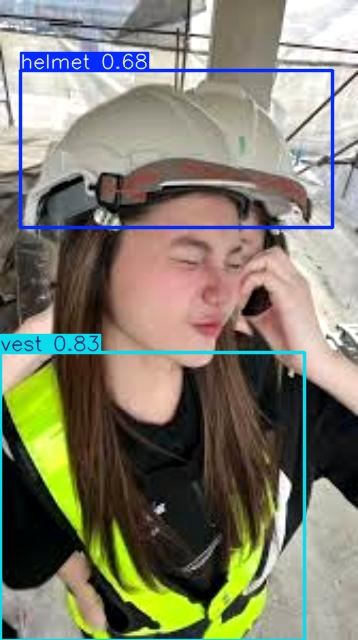


🧾 Results saved in: runs/detect/predict


In [7]:
from ultralytics import YOLO
import glob, os
from IPython.display import Image, display

# Load best model
model = YOLO("runs/detect/ppe_yolov8s3/weights/best.pt")

# Pick 3–5 random validation images
val_imgs = glob.glob("/content/Safety-Vest-+-Safety-Helmet-8/valid/images/*.jpg")[:5]

# Run prediction
pred = model.predict(source=val_imgs, conf=0.25, save=True)

# Display one of the annotated images
pred_dir = max(glob.glob("runs/detect/predict*"), key=os.path.getmtime)
img_path = glob.glob(f"{pred_dir}/*.jpg")[0]
display(Image(filename=img_path, width=800))

print(f"\n🧾 Results saved in: {pred_dir}")


In [13]:
# Load model
from ultralytics import YOLO
model = YOLO("runs/detect/ppe_yolov8s3/weights/best.pt")

# Export to ONNX (for portability)
_ = model.export(format="onnx")

# Check saved files
!ls -lh runs/detect/ppe_yolov8s3/weights/


Ultralytics 8.3.30 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from 'runs/detect/ppe_yolov8s3/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (21.5 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 296.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.5/166.5 kB 419.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.5/300.5 MB 210.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 173.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 217.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 17.3s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command f